# 

title: Water Rights Restored to the Gila River

subtitle: The impacts of irrigation on vegetation health in the Gila
River Valley

author:

-   Elsa Culler

-   Nate Quarderer

date: last-modified

image: /img/earth-analytics/water-rights/lesson-water-rights.png

image-alt: “Dry river with dead plants turns into a stream with living
plants”

description: \|

In 2004, the Akimel O’‘otham and Tohono O’’odham tribes won a water
rights settlement in the US Supreme Court. Using satellite imagery, we
can see the effects of irrigation water on the local vegetation.

learning-goals:

-   Open raster or image data using code

-   Combine raster data and vector data to crop images to an area of
    interest

-   Summarize raster values with stastics

-   Analyze a time-series of raster images

params:

id: stars

site_name: Gila River Indian Community

event: water rights case

data_dir: gila-river

jupyter:

kernelspec:

    name: learning-portal

    language: python

    display_name: Learning Portal

# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [12]:
%store -r aitsn_gdf gdf boundary_gdf project ndvi_paths ndvi_path ndvi_das 
%store -r filename doy_str date da year day_of_year date ndvi_stack
%store -r ndvi_0111 ndvi_1222 ndvi_0111_mean ndvi_1222_mean 

You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [15]:
# Import libraries
import json
import os
import pathlib
import geopandas as gpd
import hvplot.xarray
import hvplot.pandas
import rioxarray as rxr
import xarray as xr
from datetime import datetime
from glob import glob
import earthpy
import matplotlib.pyplot as plt
from shapely.geometry import box

In [ ]:
#reload previous data and plots too big for %store if needed
ndvi_change = xr.open_dataset("ndvi_change.nc")

ndvi_plot = ndvi_change.hvplot(
    geo=True,
    x='x',
    y='y',
    cmap=plt.cm.PiYG,
    colorbar=True,
    title='NDVI Change from 2001-2011 to 2012-2022',
    frame_width=600
)
boundary_plot = boundary_gdf.hvplot(
    geo=True,
    fill_color=None,
    line_color='black'
)

ndvi_boundary_plot = (ndvi_plot * boundary_plot)


# STEP 4: Is the NDVI different within the **Gila River Indian Community** after the **water rights case**?

You will compute the mean NDVI inside and outside the Gila River Indian Community boundary.
First, use the code below to get a `GeoDataFrame` of the area outside
the Reservation.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>Check the variable names - Make sure that the code uses your
boundary <code>GeoDataFrame</code></li>
<li>How could you test if the geometry was modified correctly? Add some
code to take a look at the results.</li>
</ol></div></div>

<Axes: >

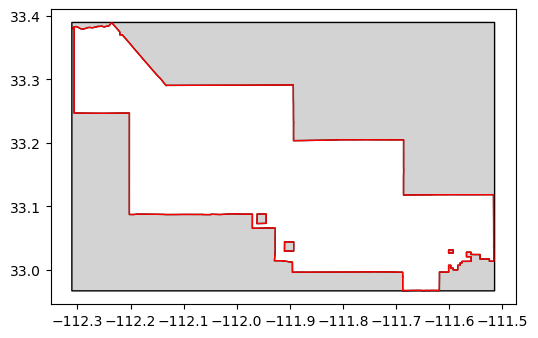

In [24]:
# Compute the area outside the Gila River Indian Community

# Match boundary CRS to NDVI CRS 
boundary_gdf = boundary_gdf.to_crs(ndvi_change.rio.crs)

# Make raster of one polygon of full boundary
full_bounds = box(*ndvi_change.rio.bounds())

# Inside boundaries
inside_gdf = boundary_gdf.copy()

# Outside boundaries
outside_geom = full_bounds.difference(boundary_gdf.union_all())
outside_gdf = gpd.GeoDataFrame(geometry=[outside_geom], crs=boundary_gdf.crs)

# Check code visually
ax = outside_gdf.plot(color="lightgray", edgecolor='black', figsize=(6,6))
boundary_gdf.plot(ax=ax, color='none', edgecolor='red')


Next, clip your DataArray to the boundaries for both inside and outside
the reservation. You will need to replace the `GeoDataFrame` name with
your own. Check out the [lesson on clipping data with the `rioxarray`
library in the
textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/crop-raster-data-with-shapefile-in-python/).

> **GOTCHA ALERT**
>
> It’s important to use `from_disk=True` when clipping large arrays like
> this. It allows the computer to use less valuable memory resources
> when clipping - you will probably find that otherwise the cell below
> crashes your kernel.

In [ ]:
# Clip data to both inside and outside the boundary
ndvi_var = ndvi_change['NDVI']

#inside boundary
ndvi_inside = ndvi_var.rio.clip(
    inside_gdf.geometry,
    inside_gdf.crs,
    from_disk=True
)
#outside boundary
ndvi_outside = ndvi_var.rio.clip(
    outside_gdf.geometry,
    outside_gdf.crs,
    from_disk=True
)

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>For <strong>both inside and outside</strong> the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary:</p>
<ul>
<li>Group the data by year</li>
<li>Take the mean. You always need to tell reducing methods in
<code>xarray</code> what dimensions you want to reduce. When you want to
summarize data across <strong>all</strong> dimensions, you can use the
<code>...</code> syntax, e.g. <code>.mean(...)</code> as a
shorthand.</li>
<li>Select the NDVI variable</li>
<li>Convert to a DataFrame using the <code>to_dataframe()</code>
method</li>
<li>Join the two DataFrames for plotting using the <code>.join()</code>
method. You will need to rename the columns using the
<code>lsuffix=</code> and <code>rsuffix=</code> parameters</li>
</ul>
<p>Finally, plot annual July means for both inside and outside the
Reservation on the same plot.</p></div></div>

> **GOTCHA ALERT**
>
> The DateIndex in pandas is a little different from the Datetime
> Dimension in xarray. You will need to use the `.dt.year` syntax to
> access information about the year, not just `.year`.

In [ ]:
# Compute mean annual July NDVI


Now, take the difference between outside and inside the site boundary
and plot that. What do you observe? Don’t forget to write a headline and
description of your plot!

In [7]:
# Plot difference inside and outside the boundary

YOUR HEADLINE AND DESCRIPTION HERE

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [11]:
%store var1 var2

Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!